## Part-02: Using CatBoost Model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\Karthik Shetty\AppData\Local\Temp\ipykernel_19344\659884918.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import catboost
# Print the CatBoost version
print("\n CatBoost version:", catboost.__version__)


 CatBoost version: 1.2.2


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from catboost import CatBoostClassifier

In [4]:
# Importing the Dataset
student_data = pd.read_csv('../Data/student_data_with_placed_colleges.csv') 

In [5]:
student_data['Branch'].unique()

array(['Civil Engineering', 'Mechanical Engineering',
       'Electronics and Telecommunication Engineering',
       'Computer Science and Engineering (IoT and Cyber Security)',
       'Information Technology', 'Not eligible',
       'Electronics and Computer Science', 'Chemical Engineering',
       'Computer Science and Engineering(Cyber Security)',
       'Electrical Engineering',
       'Artificial Intelligence and Data Science', 'Computer Engineering',
       'Artificial Intelligence and Machine Learning'], dtype=object)

In [6]:
student_data['College'].unique()

array(['TCET', 'RCE', 'VJTI', 'LTCE', 'XIE', 'Not eligible'], dtype=object)

In [7]:
# Data Preparation

# Prepare features and target variables
X = student_data[['Age', 'Socioeconomic_Background', 'SSC_Marks_Percentage', 'HSC_Marks_Percentage', 'MHTCET_Scores_Percentile', 'JEE_Mains_Scores_Percentile']]
y_college = student_data['College']
y_branch = student_data['Branch']

# Encode categorical variables (Socioeconomic_Background)
le = LabelEncoder()
X['Socioeconomic_Background'] = le.fit_transform(X['Socioeconomic_Background'])

C:\Users\Karthik Shetty\AppData\Local\Temp\ipykernel_19344\3223123316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Socioeconomic_Background'] = le.fit_transform(X['Socioeconomic_Background'])


In [8]:
# Print the encoded values
print("Encoded values for Socioeconomic_Background:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Encoded values for Socioeconomic_Background:
{'EWS': 0, 'OBC': 1, 'Open': 2, 'SC': 3, 'ST': 4, 'State Quota': 5}


In [9]:
# Train-Test Split and Scaling

# Split the data into training and testing sets
X_train, X_test, y_college_train, y_college_test, y_branch_train, y_branch_test = train_test_split(
    X, y_college, y_branch, test_size=0.2, random_state=42)


In [10]:
# Define categorical features for CatBoost
cat_features = ['Socioeconomic_Background']

In [11]:
college_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', cat_features=cat_features, random_seed=42)
branch_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', cat_features=cat_features, random_seed=42)

college_model.fit(X_train, y_college_train)
branch_model.fit(X_train, y_branch_train)

0:	learn: 1.4439667	total: 243ms	remaining: 4m 2s
1:	learn: 1.2279915	total: 297ms	remaining: 2m 28s
2:	learn: 1.0783051	total: 342ms	remaining: 1m 53s
3:	learn: 0.9576106	total: 379ms	remaining: 1m 34s
4:	learn: 0.8616800	total: 415ms	remaining: 1m 22s
5:	learn: 0.7884936	total: 451ms	remaining: 1m 14s
6:	learn: 0.7234036	total: 492ms	remaining: 1m 9s
7:	learn: 0.6646633	total: 526ms	remaining: 1m 5s
8:	learn: 0.6112866	total: 563ms	remaining: 1m 1s
9:	learn: 0.5660847	total: 602ms	remaining: 59.6s
10:	learn: 0.5279602	total: 644ms	remaining: 57.9s
11:	learn: 0.4959229	total: 679ms	remaining: 55.9s
12:	learn: 0.4668064	total: 716ms	remaining: 54.4s
13:	learn: 0.4374862	total: 748ms	remaining: 52.7s
14:	learn: 0.4104588	total: 785ms	remaining: 51.5s
15:	learn: 0.3897391	total: 817ms	remaining: 50.3s
16:	learn: 0.3701573	total: 853ms	remaining: 49.3s
17:	learn: 0.3526887	total: 886ms	remaining: 48.4s
18:	learn: 0.3410138	total: 923ms	remaining: 47.7s
19:	learn: 0.3295619	total: 955ms	re

In [12]:
# Inspect the values assigned during one-hot encoding for 'Socioeconomic_Background'
print("Values assigned during one-hot encoding for Socioeconomic_Background:")
print(le.classes_)

# Evaluate CatBoost Models

# Predict College and Branch for the test data
y_college_pred = college_model.predict(X_test)
y_branch_pred = branch_model.predict(X_test)

# Evaluate the models
college_accuracy = accuracy_score(y_college_test, y_college_pred)
branch_accuracy = accuracy_score(y_branch_test, y_branch_pred)

print("College Prediction Accuracy:", college_accuracy)
print("Branch Prediction Accuracy:", branch_accuracy)

Values assigned during one-hot encoding for Socioeconomic_Background:
['EWS' 'OBC' 'Open' 'SC' 'ST' 'State Quota']
College Prediction Accuracy: 0.929
Branch Prediction Accuracy: 0.878


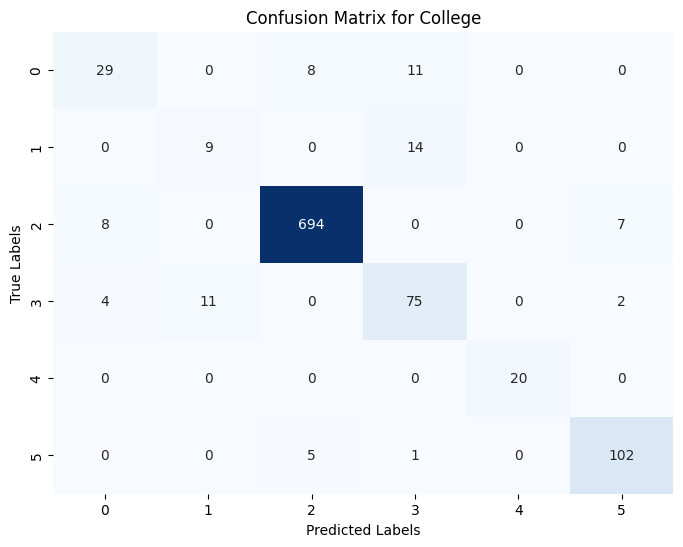

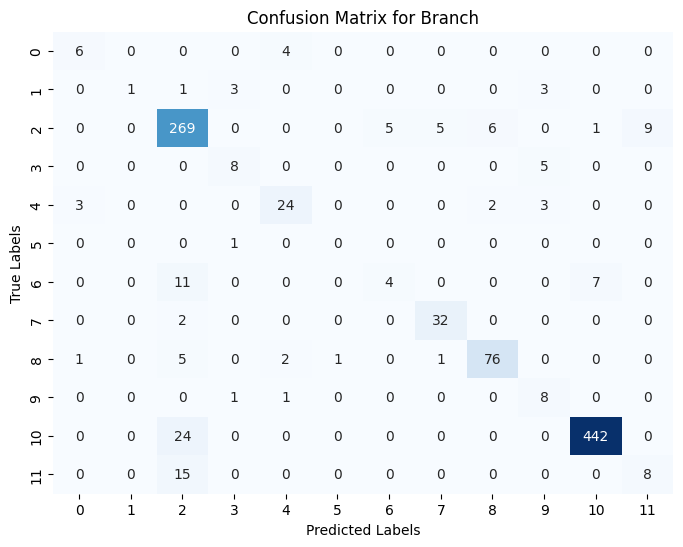

In [13]:
# Model Evaluation
# Add model evaluation using confusion matrices and classification reports
conf_matrix_college = confusion_matrix(y_college_test, y_college_pred)
conf_matrix_branch = confusion_matrix(y_branch_test, y_branch_pred)

# Plot confusion matrix for College
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_college, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for College')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for Branch
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_branch, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Branch')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
# Hyperparameter Tuning
# We'll tune the hyperparameters of CatBoost models using grid search.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1]
}


In [15]:
# College model tuning
college_grid_search = GridSearchCV(estimator=CatBoostClassifier(iterations=1000, loss_function='MultiClass', cat_features=cat_features, random_seed=42),
                                   param_grid=param_grid,
                                   cv=3,
                                   scoring='accuracy')

college_grid_search.fit(X_train, y_college_train)

print("Best parameters for College model:", college_grid_search.best_params_)

0:	learn: 1.7556806	total: 27.4ms	remaining: 27.4s
1:	learn: 1.7222828	total: 52.1ms	remaining: 26s
2:	learn: 1.6881437	total: 69.7ms	remaining: 23.2s
3:	learn: 1.6554293	total: 91.8ms	remaining: 22.8s
4:	learn: 1.6262349	total: 116ms	remaining: 23.1s
5:	learn: 1.5977642	total: 137ms	remaining: 22.8s
6:	learn: 1.5708068	total: 158ms	remaining: 22.3s
7:	learn: 1.5425976	total: 174ms	remaining: 21.6s
8:	learn: 1.5178599	total: 194ms	remaining: 21.3s
9:	learn: 1.4943737	total: 212ms	remaining: 21s
10:	learn: 1.4711191	total: 234ms	remaining: 21s
11:	learn: 1.4478820	total: 259ms	remaining: 21.3s
12:	learn: 1.4243836	total: 284ms	remaining: 21.6s
13:	learn: 1.4039114	total: 305ms	remaining: 21.5s
14:	learn: 1.3832981	total: 329ms	remaining: 21.6s
15:	learn: 1.3634730	total: 358ms	remaining: 22s
16:	learn: 1.3440552	total: 385ms	remaining: 22.3s
17:	learn: 1.3243506	total: 409ms	remaining: 22.3s
18:	learn: 1.3048747	total: 433ms	remaining: 22.4s
19:	learn: 1.2874424	total: 458ms	remaining: 

In [16]:
# Branch model tuning
branch_grid_search = GridSearchCV(estimator=CatBoostClassifier(iterations=1000, loss_function='MultiClass', cat_features=cat_features, random_seed=42),
                                  param_grid=param_grid,
                                  cv=3,
                                  scoring='accuracy')

branch_grid_search.fit(X_train, y_branch_train)

print("Best parameters for Branch model:", branch_grid_search.best_params_)

c:\Programming Repository\Visual Studio\Visual Studio Code\RBL Project\project-backend\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0:	learn: 2.4936477	total: 32.4ms	remaining: 32.4s
1:	learn: 2.4323540	total: 61ms	remaining: 30.4s
2:	learn: 2.3672533	total: 90.1ms	remaining: 30s
3:	learn: 2.3121555	total: 119ms	remaining: 29.7s
4:	learn: 2.2620636	total: 149ms	remaining: 29.7s
5:	learn: 2.2163451	total: 179ms	remaining: 29.7s
6:	learn: 2.1785032	total: 209ms	remaining: 29.7s
7:	learn: 2.1323006	total: 235ms	remaining: 29.2s
8:	learn: 2.0905400	total: 267ms	remaining: 29.4s
9:	learn: 2.0539154	total: 296ms	remaining: 29.3s
10:	learn: 2.0185173	total: 325ms	remaining: 29.2s
11:	learn: 1.9856119	total: 354ms	remaining: 29.2s
12:	learn: 1.9535276	total: 386ms	remaining: 29.3s
13:	learn: 1.9220468	total: 417ms	remaining: 29.4s
14:	learn: 1.8919997	total: 448ms	remaining: 29.4s
15:	learn: 1.8629217	total: 479ms	remaining: 29.5s
16:	learn: 1.8364645	total: 510ms	remaining: 29.5s
17:	learn: 1.8099154	total: 539ms	remaining: 29.4s
18:	learn: 1.7838480	total: 569ms	remaining: 29.4s
19:	learn: 1.7596491	total: 601ms	remainin

In [17]:
# Classification Report for more detailed metrics
print("Classification Report for College:\n", classification_report(y_college_test, y_college_pred))
print("Classification Report for Branch:\n", classification_report(y_branch_test, y_branch_pred))

Classification Report for College:
               precision    recall  f1-score   support

        LTCE       0.71      0.60      0.65        48
Not eligible       0.45      0.39      0.42        23
         RCE       0.98      0.98      0.98       709
        TCET       0.74      0.82      0.78        92
        VJTI       1.00      1.00      1.00        20
         XIE       0.92      0.94      0.93       108

    accuracy                           0.93      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.93      0.93      0.93      1000

Classification Report for Branch:
                                                            precision    recall  f1-score   support

                 Artificial Intelligence and Data Science       0.60      0.60      0.60        10
                                     Chemical Engineering       1.00      0.12      0.22         8
                                        Civil Engineering       0.82      0.91      0.86

## Saving the model

In [19]:
# Save college_model
college_model.save_model("../Saved_Models/college_model.cbm")

In [ ]:
# Save branch_model
branch_model.save_model("../Saved_Models/branch_model.cbm")